Get useful insights in the data from market sales

In [1]:
# the libraries to use
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Show the data in the table

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir(r"/content/drive/My Drive/")

Mounted at /content/drive


In [3]:

# Path to the CSV file in Google Drive
csv_file_path = '/content/drive/My Drive/lessons/supermarket_sales.csv'

# Read data into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the DataFrame
df


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


Most used payment method

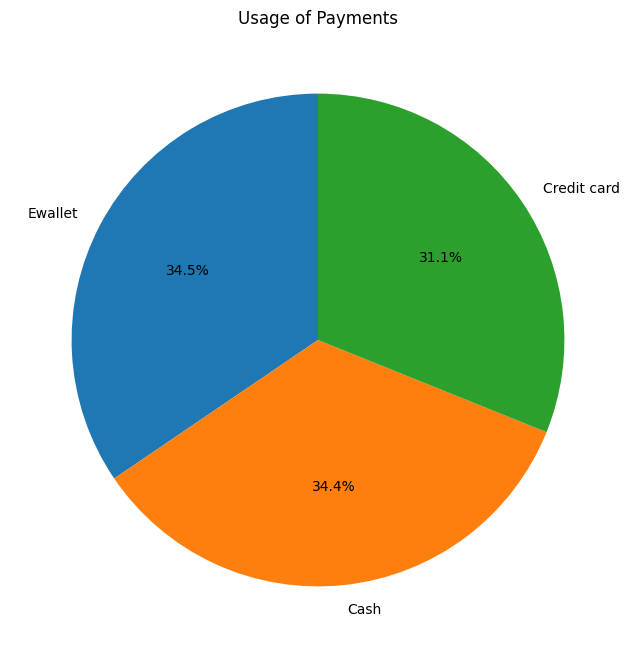

In [4]:
# Extract the 'Payments' column
payments_data = df['Payment']

# Count the occurrences of each payment type
payment_counts = payments_data.value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Usage of Payments')
plt.show()



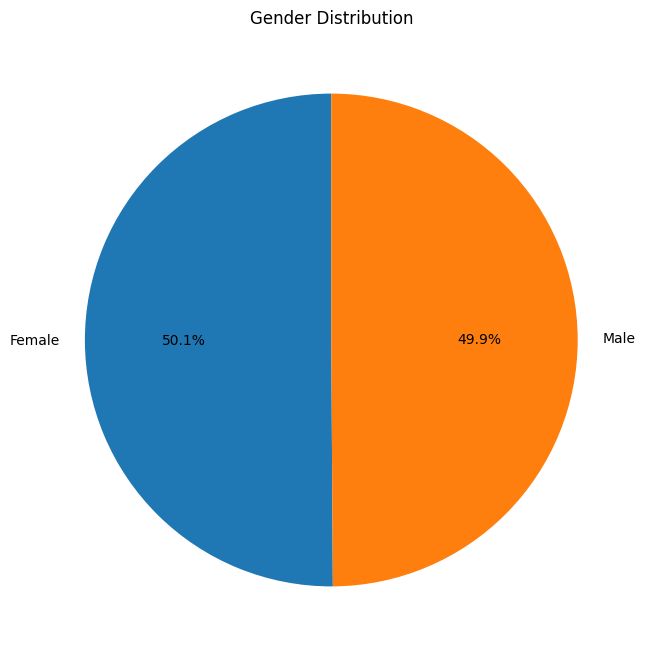

In [5]:
# Extract the 'Gender' column
gender_data = df['Gender']

# Count the occurrences of each gender
gender_counts = gender_data.value_counts()

# Plot a pie chart for gender distribution
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

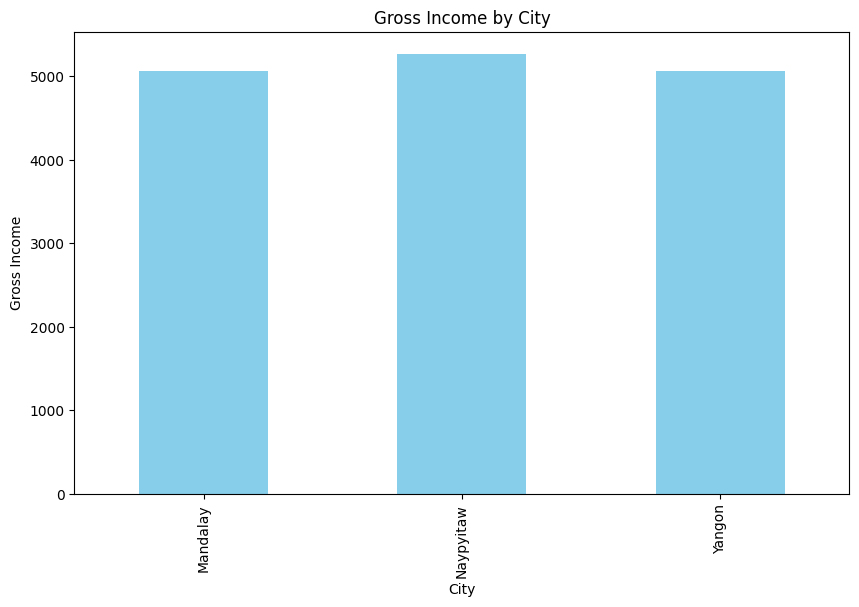

In [6]:
# Group by 'Product Line' and sum the 'Gross Income' for each product line
product_line_income = df.groupby('City')['gross income'].sum()

# Plot a bar chart for gross income by product line
plt.figure(figsize=(10, 6))
product_line_income.plot(kind='bar', color='skyblue')
plt.title('Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()


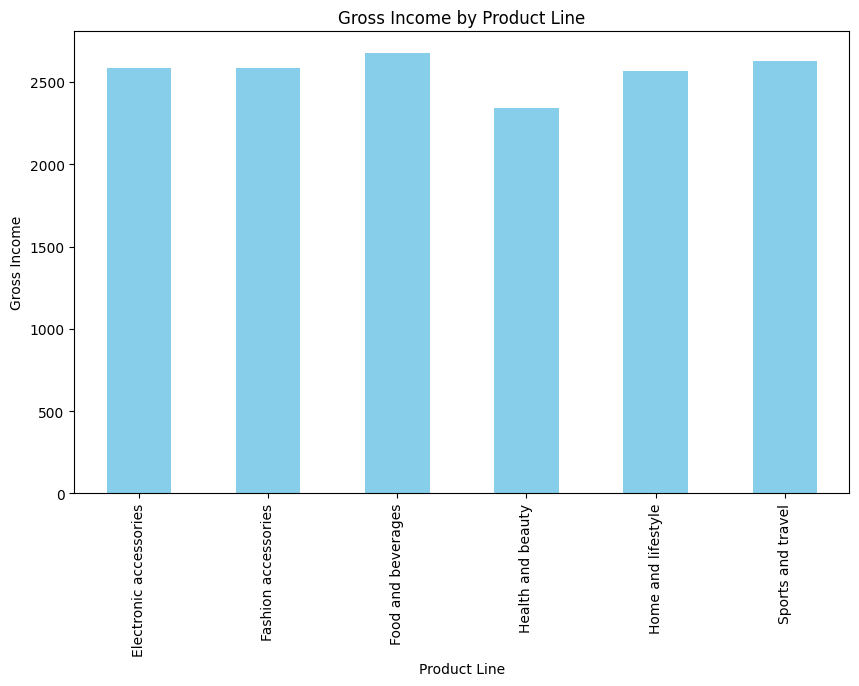

In [7]:
# Group by 'Product Line' and sum the 'Gross Income' for each product line
product_line_income = df.groupby('Product line')['gross income'].sum()

# Plot a bar chart for gross income by product line
plt.figure(figsize=(10, 6))
product_line_income.plot(kind='bar', color='skyblue')
plt.title('Gross Income by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Gross Income')
plt.show()

In [8]:
# Find the branch with the overall highest rating
highest_rated_branch = df.loc[df['Rating'].idxmax(), 'Branch']
highest_rating = df['Rating'].max()

# Filter the DataFrame to show all other branches
other_branches_df = df[df['Branch'] != highest_rated_branch]

# Display results
print(f"The branch with the overall highest rating is {highest_rated_branch} with a rating of {highest_rating}")



The branch with the overall highest rating is C with a rating of 10.0


In [9]:
# Find the three branches with the highest ratings

sorted_df = df.sort_values(by='Rating', ascending=False)
top_10_branches = sorted_df.head(10)[['Branch', 'Rating']]


# Display results
print("Top 3 branches:")
print(top_10_branches)

Top 3 branches:
    Branch  Rating
387      A    10.0
159      B    10.0
853      B    10.0
62       B    10.0
60       C    10.0
382      B     9.9
194      A     9.9
179      C     9.9
86       C     9.9
23       A     9.9


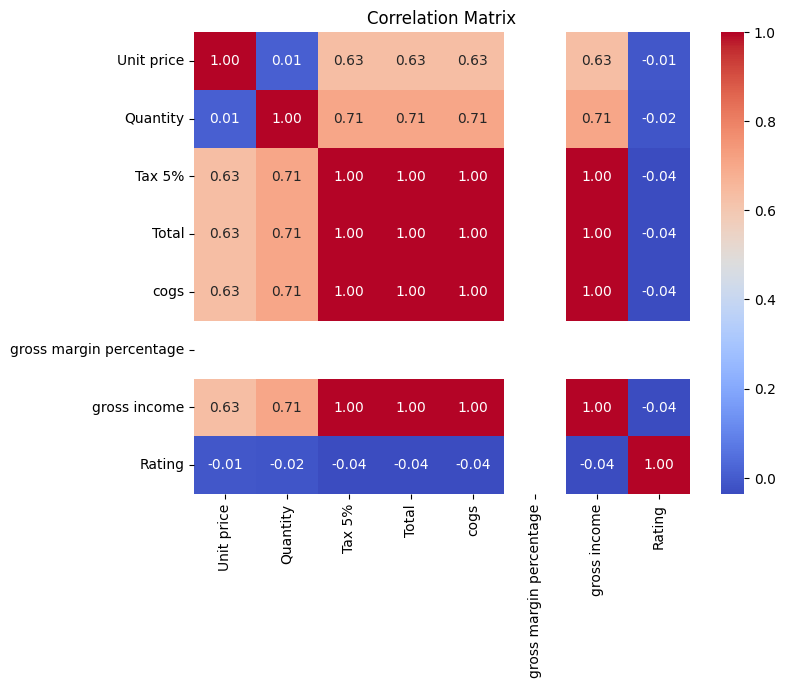

In [10]:
# Create a correlation matrix
# correlation_matrix = df.corr()
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()